# Summary Project #2

**Project Description:**

We are working at a startup that sells food products. My task is to understand how users of mobile application behave.

I will study the sales funnel. Find out how users progress towards making a purchase. How many users complete a purchase, and how many get stuck at previous stages? Specifically, at which stages do they get stuck?

After that, investigate the results of an A/A/B experiment. The designers want to change the fonts throughout the entire application, but the managers are concerned that it might be unfamiliar to users. It was agreed to make a decision based on the results of the A/A/B test. Users have been divided into 3 groups: 2 control groups with the old fonts and one experimental group with the new fonts. Determine which font performs better.

**Research Objective:**
- Determine if font size affects user purchasing behavior.

**Research Tasks:**
- Test the hypothesis of equality or inequality among the three groups.

**Brief Research Plan:**
1. Data Preprocessing;
2. Data Preparation, checking for missing values and duplicates;
3. Data Exploration: the number of users, events, maximum and minimum dates, potential dataset filtering;
4. Event Funnel Analysis: the sequence of events, user conversion between events;
5. Test for statistical differences between groups.

## Data Preprocessing

In [1]:
import pandas as pd
import scipy.stats as st
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
try:
    logs = pd.read_csv('datasets/logs_exp.csv', sep='\t')  
except:    
    logs = pd.read_csv('/datasets/logs_exp.csv', sep='\t')
logs.head(5)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


## Подготовка данных

In [3]:
# Use the columns method to replace column names
logs.columns = ['event_name','device_id','event_timestamp','exp_id']

In [4]:
# Check Data Types
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_name       244126 non-null  object
 1   device_id        244126 non-null  int64 
 2   event_timestamp  244126 non-null  int64 
 3   exp_id           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [5]:
# Check Data Types & change types
logs['event_timestamp'] = pd.to_datetime(logs['event_timestamp'], unit='s')
logs

,event_name,device_id,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246


In [6]:
# Check for Missing Values
logs.isna().sum()

event_name         0
device_id          0
event_timestamp    0
exp_id             0
dtype: int64

In [7]:
# Check for Duplicates
logs.duplicated().sum()

413

Duplicates make up 0.17 percent of the total data, they can be ignored.

In [8]:
logs.drop_duplicates()

,event_name,device_id,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246


In [9]:
# Add a new column for date and time,
logs['date'] = logs['event_timestamp'].dt.date
logs.head(5)

,event_name,device_id,event_timestamp,exp_id,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


## Data Exploration: the number of users, events, maximum and minimum dates, potential dataset filtering

### Let's check the total number of events in the log

In [10]:
print("Total event types in the log:", len(logs['event_name'].value_counts()))
print("Total number of events:", len(logs['event_name']))

Total event types in the log: 5
Total number of events: 244126


### Let's check the total number of users in the log:

In [11]:
print("Total users in the log:", len(logs['device_id'].value_counts()))

Total users in the log: 7551


### The average number of events per user 

In [12]:
print("On average, events per user:", round(logs['device_id'].value_counts().mean(), 2))

On average, events per user: 32.33


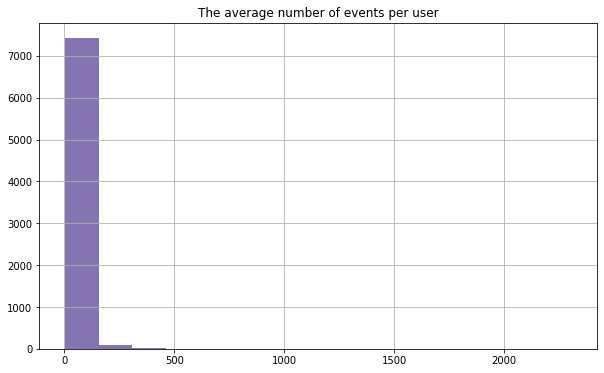

In [13]:
event_per_user = logs.pivot_table(index=['device_id'],values = 'event_name', aggfunc='count')
event_per_user['event_name'].hist(bins=15,figsize=(10, 6),color = (0.2,0.1,0.5,0.6));
plt.title('The average number of events per user');

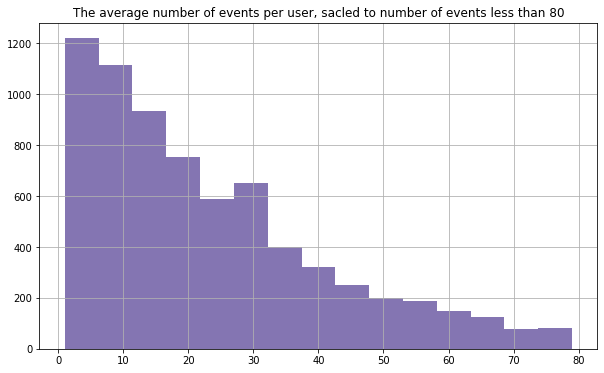

In [14]:
event_per_user.query('event_name < 80').hist(bins=15,figsize=(10, 6),color = (0.2,0.1,0.5,0.6));
plt.title('The average number of events per user, sacled to number of events less than 80');

From the histogram, it can be seen that the number of events per user gradually decreases. More than 80 events per user occur infrequently and can be considered anomalies. The average number of events per user is 32.33.

### Minimum and maximum start day

In [15]:
print("Minimum date of observation:", logs['date'].min())
print("Maximum date of observation:", logs['date'].max())

Minimum date of observation: 2019-07-25
Maximum date of observation: 2019-08-07


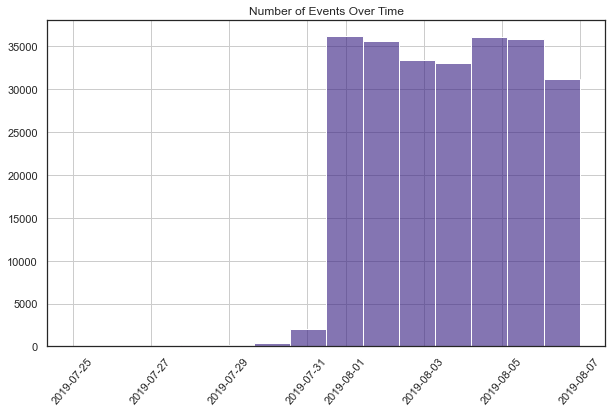

In [16]:
# Let's examine how the data volume changes: create a bar chart that shows the number of events
# depending on time, broken down by groups.

# Set the style to 'white' (if using Seaborn)
sns.set(style='white')

# Create a histogram of events by date with 14 bins, specifying the figure size and color
logs['date'].hist(bins=14, figsize=(10, 6), color=(0.2, 0.1, 0.5, 0.6))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=50)

# Set the title of the chart
plt.title('Number of Events Over Time')

# Display the chart
plt.show()

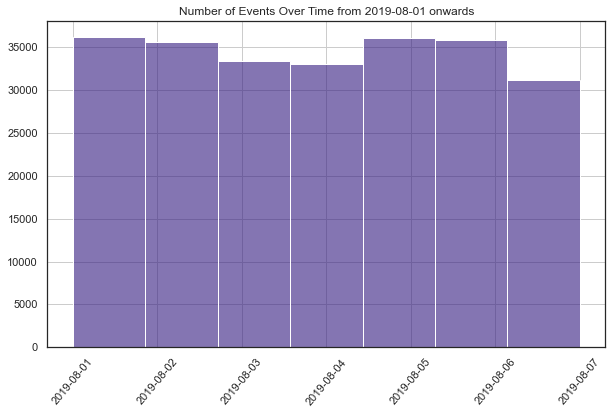

In [17]:
# Convert the 'date' column to datetime
logs['date'] = pd.to_datetime(logs['date'])

# Filter logs for dates after "2019-07-31"
logs_date_fltr = logs.query('date > "2019-07-31"')

# Create a histogram of events by date with 7 bins, specifying the figure size and color
logs_date_fltr['date'].hist(bins=7, figsize=(10, 6), color=(0.2, 0.1, 0.5, 0.6))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=50)

# Set the title of the chart
plt.title('Number of Events Over Time from 2019-08-01 onwards');

Minimum date: 2019-07-25 and maximum date: 2019-08-07. After constructing the diagram, it is clear that before 2019-08-01 almost no events occurred; after filtering out these dates, we built a new histogram.

Let's establish that the data is complete from 2019-08-01 and discard other dates.

### Check how many events and users have been lost by discarding old data

In [18]:
print(logs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       244126 non-null  object        
 1   device_id        244126 non-null  int64         
 2   event_timestamp  244126 non-null  datetime64[ns]
 3   exp_id           244126 non-null  int64         
 4   date             244126 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 9.3+ MB
None


In [19]:
logs_date_fltr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241298 entries, 2828 to 244125
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       241298 non-null  object        
 1   device_id        241298 non-null  int64         
 2   event_timestamp  241298 non-null  datetime64[ns]
 3   exp_id           241298 non-null  int64         
 4   date             241298 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 11.0+ MB


In [20]:
print('The percentage of data discarded is:', round((100 - (len(logs_date_fltr['event_name'])/len(logs['event_name'])*100)),2))

The percentage of data discarded is: 1.16


In [21]:
user_count_old = len(logs['device_id'].value_counts())
user_count_new = len(logs_date_fltr['device_id'].value_counts())
print('Total users logs:',user_count_old)
print('Total users logs_date_fltr:', user_count_new)

Total users logs: 7551
Total users logs_date_fltr: 7534


In [22]:
print('The percentage of unique data users is:',round(1 - user_count_new/user_count_old,3)*100)

The percentage of unique data users is: 0.2


In [23]:
print('Total users logs:',logs.groupby(by='event_name')['event_name'].count().sort_values(ascending=False))

Total users logs: event_name
MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: event_name, dtype: int64


In [24]:
print('Total users logslogs_date_fltr:',logs_date_fltr.groupby(by='event_name')['event_name'].count().sort_values(ascending=False))

Total users logslogs_date_fltr: event_name
MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: event_name, dtype: int64


The original dataframe had 244126 rows, the filtered one had 241298. The number of discarded data is 1.16%.

A total of 17 unique users were discarded. 0.2% of the total.

Also for events, when filtering data, the percentage of discarded data can be considered insignificant.

### Check if there are users from all three experimental groups

In [25]:
logs_date_fltr['exp_id'].value_counts()

248    84726
246    79425
247    77147
Name: exp_id, dtype: int64

All three groups are present in the filtered date.

**The data was also checked and studied**

There were a total of 5 events in the dataframe. Total number of events: 244126. Total number of unique users 7551. Average number of events per user - 32.33. But due to what the anomalous values represent, you can notice that the average number of events for a user is: 0 - 30.

The minimum date of the event was determined: July 25, 2019 and the maximum date of the event: August 07, 2019. After studying the data, it can be seen that until August 01, 2019, the events were practically unaffected. They found that the data was complete from 08/01/2019 and discarded other dates.

When filtering data, the percentage of data discarded is 1.2%. The percentage of unique users is 0.22% of the total.

 ## Exploring the event funnel

### Check what events are in the logs and how often they occur

In [26]:
logs_date_fltr.groupby(by='event_name')['event_name'].count().sort_values(ascending=False)

event_name
MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: event_name, dtype: int64

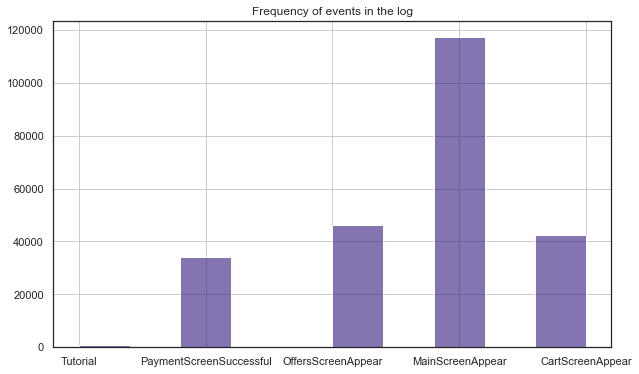

In [27]:
sns.set(style='white')
plt.figure(figsize=(10, 6))

logs_date_fltr['event_name'].sort_values(ascending=False).hist(color = (0.2,0.1,0.5,0.6));
plt.title('Frequency of events in the log');

There are 5 events in the log, the most frequent: Main Screen Appear, then OffersScreenAppear and the rarest - Tutorial.

### Count how many users performed each of these events

In [28]:
logs_date_fltr.groupby('event_name')['device_id'].count().sort_values(ascending=False)

event_name
MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: device_id, dtype: int64

In [29]:
event_per_user = logs_date_fltr.pivot_table(index=['event_name'],values = 'device_id', aggfunc='nunique')
event_per_user['share'] = round(event_per_user['device_id'] / logs_date_fltr['device_id'].nunique(), 2) * 100
event_per_user = event_per_user.sort_values(by='share', ascending=False)

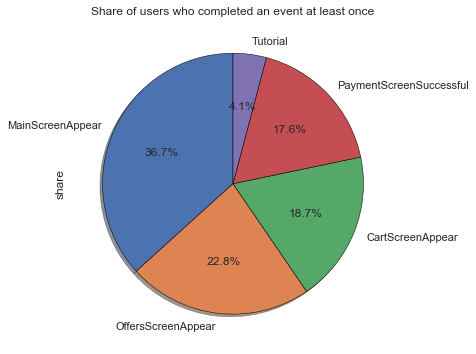

In [30]:
event_per_user.plot(y='share', 
                    kind='pie',
                    figsize=(6,6), 
                    autopct = '%1.1f%%',
                    shadow = True, startangle = 90,
                    wedgeprops= {"edgecolor":"black",
                     'linewidth': 0.5,
                     'antialiased': True});
plt.title('Share of users who completed an event at least once');
plt.legend('',frameon=False);
plt.show();

**The most popular event is:**

1. Main Screen Appear
2. Offers Screen Appear
3. Cart Screen Appear
4. Payment Screen Appear
5. Tutorial

A certain funnel of events is taking shape. Tutorial is not the last step in this funnel, but is likely to be used only in rare cases.

### Based on the event funnel, we will calculate what proportion of users proceed to the next step of the funnel

In [31]:
# Remove Tutorial
event_per_user = event_per_user.drop(['Tutorial'])

In [32]:
# Adding a column with conversion by steps
event_per_user['conversion'] = round(
    (event_per_user['device_id'] / event_per_user['device_id'].shift(1) * 100).fillna(100),2)
display(event_per_user)

,device_id,share,conversion
event_name,,,
MainScreenAppear,7419,98.0,100.00
OffersScreenAppear,4593,61.0,61.91
CartScreenAppear,3734,50.0,81.30
PaymentScreenSuccessful,3539,47.0,94.78


Most users are lost from the MainScreenAppear step to OffersScreenAppear, only 61.91% move on to the next step.

81.30% of users switch from the OffersScreenAppear step to CartScreenAppear.

From CartScreenAppear to PaymentScreenSuccessful 94.78%. Which shows good conversion at this step.

### What percentage of users make it from the first event to payment?

In [33]:
share_users = round(event_per_user['device_id'][3]/event_per_user['device_id'][0]*100,2)

In [34]:
print('Share of users moving from the first event to payment:', share_users, '%')

Share of users moving from the first event to payment: 47.7 %


In [35]:
event_per_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, MainScreenAppear to PaymentScreenSuccessful
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   device_id   4 non-null      int64  
 1   share       4 non-null      float64
 2   conversion  4 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 128.0+ bytes


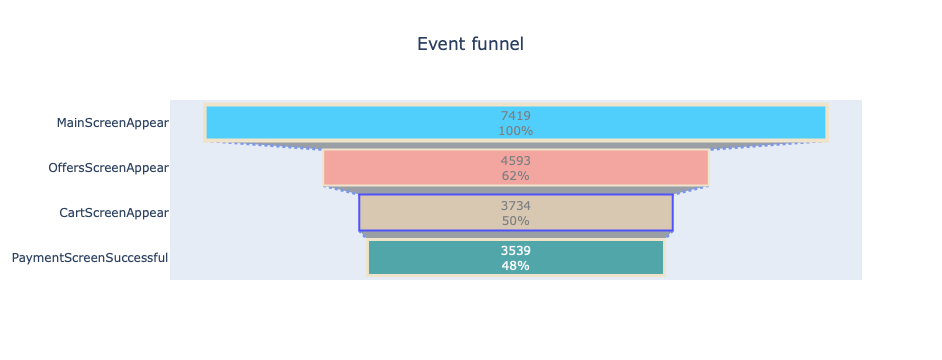

In [56]:
from plotly import graph_objects as go

event_per_user.reset_index(inplace=True)

fig = go.Figure(go.Funnel(
    y = event_per_user['event_name'],
    x = event_per_user['device_id'],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["deepskyblue", "salmon", "tan", "teal", "silver"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue", "wheat", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
    )
fig.update_layout(title='Event funnel', title_x = 0.5);
fig.show()

**Conclusion from studying the event funnel:**

There are 5 events in the log, the most frequent: MainScreenAppear, then OffersScreenAppear and the rarest - Tutorial.

Sequence of events by frequency performed by users:

1. Main Screen Appear
2. Offers Screen Appear
3. Cart Screen Appear
4. Payment Screen Appear
5. Tutorial

A certain funnel of events is taking shape. Tutorial is not the last step in this funnel, but is most likely used only in rare cases.

Most users are lost from the MainScreenAppear step to OffersScreenAppear, only 61.91% move on to the next step.

81.30% of users switch from the OffersScreenAppear step to CartScreenAppear.

From CartScreenAppear to PaymentScreenSuccessful 94.78%. Which shows good conversion at this step.

Share of users moving from the first event to payment: 47.7%

## Check the results of the experiment

### Let's study how many users are in each experimental group

In [57]:
# Analyze the number of users in each group
users_grouped = logs_date_fltr.pivot_table(index='exp_id', values='device_id',aggfunc='nunique')
users_grouped.columns = ['Total_users']
users_grouped

,Total_users
exp_id,
246,2484
247,2513
248,2537


In [58]:
# Analyze the probability of users falling into both groups
logs_date_fltr.groupby('device_id').agg({'exp_id' : 'nunique'}).query('exp_id>1').count()

exp_id    0
dtype: int64

### Count the number of users who completed the event in each of the control groups

In [40]:
users_grouped_action = logs_date_fltr.pivot_table(
    index='exp_id', 
    columns = 'event_name',
    values='device_id',
    aggfunc='nunique')

users_grouped_action = users_grouped_action.drop(['Tutorial'], axis =1)
users_grouped_action = users_grouped_action.merge(users_grouped, on='exp_id')
users_grouped_action

,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Total_users
exp_id,,,,,
246,1266,2450,1542,1200,2484
247,1238,2476,1520,1158,2513
248,1230,2493,1531,1181,2537


In [70]:
# Function to test hypotheses
def stat_group_check(successes, trials, alpha):
    p1 = successes[0]/trials[0]
    p2 = successes[1]/trials[1]
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
    difference = p1 - p2 
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
    distr = st.norm(0, 1)  
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-value: ', p_value)
    if p_value < alpha:
        print('We reject the null hypothesis: there is a significant difference between the shares')
        print('')
    else:
        print('It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different')
        print('')

In [60]:
# Function that receives as input the ordinal number of the group in the table and the alpha parameter, and returns the results of hypothesis testing
def check_hypo(group1, group2, alpha):
    alpha_test = alpha
    actions = [
        ('MainScreenAppear', 'count_MainScreenAppear'),
        ('OffersScreenAppear', 'count_OffersScreenAppear'),
        ('CartScreenAppear', 'count_CartScreenAppear'),
        ('PaymentScreenSuccessful', 'count_PaymentScreenSuccessful')
    ]

    count_users = [users_grouped_action['Total_users'][group1], users_grouped_action['Total_users'][group2]]

    for action_name, count_name in actions:
        count_action = [users_grouped_action[action_name][group1], users_grouped_action[action_name][group2]]
        print(f'Results for {action_name} and Total Users for groups:')
        stat_group_check(count_action, count_users, alpha_test)

**Hypotheses:**

> Н0: The shares in the two groups (246 and 247) are equal

> Н1: The shares in the two groups (246 and 247) are not equal

In [61]:
check_hypo(246, 247, 0.1)

Results for MainScreenAppear and Total Users for groups:
p-значение:  0.7570597232046099
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for OffersScreenAppear and Total Users for groups:
p-значение:  0.2480954578522181
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for CartScreenAppear and Total Users for groups:
p-значение:  0.22883372237997213
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for PaymentScreenSuccessful and Total Users for groups:
p-значение:  0.11456679313141849
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different



**Conclusion:**

> Н0 the hypothesis of equality of the two groups could not be rejected.
There is no reason to consider the shares different.

### Compare the results with each of the control groups separately for each event. Compare the results with the combined control group

In [62]:
# Compare grpups 246 and 248
check_hypo(246, 248, 0.1)

Results for MainScreenAppear and Total Users for groups:
p-значение:  0.2949721933554552
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for OffersScreenAppear and Total Users for groups:
p-значение:  0.20836205402738917
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for CartScreenAppear and Total Users for groups:
p-значение:  0.07842923237520116
We reject the null hypothesis: there is a significant difference between the shares

Results for PaymentScreenSuccessful and Total Users for groups:
p-значение:  0.2122553275697796
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different



In [63]:
print('In 246 group:',round(users_grouped_action['CartScreenAppear'].iloc[0] / users_grouped_action['Total_users'].iloc[0],2)*100,'% users proceed to payment')
print('In 248 group:',round(users_grouped_action['CartScreenAppear'].iloc[2] / users_grouped_action['Total_users'].iloc[2],2)*100, '% users proceed to payment')

In 246 group: 51.0 % users proceed to payment
In 248 group: 48.0 % users proceed to payment


>  **Due to the many chack ups of the hypothesis, we get 1 check wich decline Н0 hypothesis. Let use Bonferroni correction to correct alpha.**

In [64]:
def bonferroni_correction(alpha, num_tests):
    corrected_alpha = alpha / num_tests
    return corrected_alpha

total_users = len(logs_date_fltr['device_id'].unique())

# Alpha
overall_alpha = 0.1

# Number of tests
num_tests = len(event_per_user)*4

# Bonferroni correction
corrected_alpha = bonferroni_correction(overall_alpha, num_tests)

corrected_alpha

0.00625

In [65]:
check_hypo(246, 248, 0.00625)

Results for MainScreenAppear and Total Users for groups:
p-значение:  0.2949721933554552
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for OffersScreenAppear and Total Users for groups:
p-значение:  0.20836205402738917
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for CartScreenAppear and Total Users for groups:
p-значение:  0.07842923237520116
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for PaymentScreenSuccessful and Total Users for groups:
p-значение:  0.2122553275697796
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different



After adjusting alpha using the Bonferroni method, it turned out that the null hypothesis could not be rejected.

In [66]:
# Check groups 247 and 248
check_hypo(247, 248, 0.00625)

Results for MainScreenAppear and Total Users for groups:
p-значение:  0.4587053616621515
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for OffersScreenAppear and Total Users for groups:
p-значение:  0.9197817830592261
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for CartScreenAppear and Total Users for groups:
p-значение:  0.5786197879539783
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for PaymentScreenSuccessful and Total Users for groups:
p-значение:  0.7373415053803964
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different



> **Н0 the hypothesis of equality of the two samples could not be rejected. There is no reason to consider the shares different.**

In [49]:
# Results with a pooled control group
users_grouped_action.loc[249] = users_grouped_action.iloc[0] + users_grouped_action.iloc[1]
users_grouped_action

,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Total_users
exp_id,,,,,
246,1266,2450,1542,1200,2484
247,1238,2476,1520,1158,2513
248,1230,2493,1531,1181,2537
249,2504,4926,3062,2358,4997


In [67]:
check_hypo(249, 248, 0.00625)

Results for MainScreenAppear and Total Users for groups:
p-значение:  0.29424526837179577
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for OffersScreenAppear and Total Users for groups:
p-значение:  0.43425549655188256
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for CartScreenAppear and Total Users for groups:
p-значение:  0.18175875284404386
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for PaymentScreenSuccessful and Total Users for groups:
p-значение:  0.6004294282308704
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different



> **Н0 the hypothesis of equality of the two samples could not be rejected. There is no reason to consider the shares different.**

In [51]:
users_grouped_action['conversion'] = round(
    users_grouped_action['PaymentScreenSuccessful']/users_grouped_action['MainScreenAppear'],2)*100
users_grouped_action

,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Total_users,conversion
exp_id,,,,,,
246,1266,2450,1542,1200,2484,49.0
247,1238,2476,1520,1158,2513,47.0
248,1230,2493,1531,1181,2537,47.0
249,2504,4926,3062,2358,4997,48.0


**Conversion by group:**

1. 246 group 49% of users go to the payment page;
2. 247 group 47% of users go to the payment page;
3. 248 group with changed font 47% of users go to the payment page.

### Test statistical hypotheses with a significance level of .05

In [71]:
# Check groups 246 and 247
check_hypo(246, 247, 0.05)

Results for MainScreenAppear and Total Users for groups:
p-value:  0.7570597232046099
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for OffersScreenAppear and Total Users for groups:
p-value:  0.2480954578522181
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for CartScreenAppear and Total Users for groups:
p-value:  0.22883372237997213
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for PaymentScreenSuccessful and Total Users for groups:
p-value:  0.11456679313141849
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different



> **Н0 the hypothesis of equality of the two samples could not be rejected. There is no reason to consider the shares different.**

In [72]:
# Check groups 246 and 248
check_hypo(246, 248, 0.05)

Results for MainScreenAppear and Total Users for groups:
p-value:  0.2949721933554552
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for OffersScreenAppear and Total Users for groups:
p-value:  0.20836205402738917
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for CartScreenAppear and Total Users for groups:
p-value:  0.07842923237520116
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for PaymentScreenSuccessful and Total Users for groups:
p-value:  0.2122553275697796
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different



> **Н0 the hypothesis of equality of the two samples could not be rejected. There is no reason to consider the shares different.**

In [73]:
# Check groups 247 and 248
check_hypo(247, 248, 0.05)

Results for MainScreenAppear and Total Users for groups:
p-value:  0.4587053616621515
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for OffersScreenAppear and Total Users for groups:
p-value:  0.9197817830592261
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for CartScreenAppear and Total Users for groups:
p-value:  0.5786197879539783
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for PaymentScreenSuccessful and Total Users for groups:
p-value:  0.7373415053803964
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different



> **Н0 the hypothesis of equality of the two samples could not be rejected. There is no reason to consider the shares different.**

In [74]:
# Check groups 249 and 248
check_hypo(249, 248, 0.05)

Results for MainScreenAppear and Total Users for groups:
p-value:  0.29424526837179577
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for OffersScreenAppear and Total Users for groups:
p-value:  0.43425549655188256
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for CartScreenAppear and Total Users for groups:
p-value:  0.18175875284404386
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different

Results for PaymentScreenSuccessful and Total Users for groups:
p-value:  0.6004294282308704
It was not possible to reject the null hypothesis; there is no reason to consider the shares to be different



> **Н0 the hypothesis of equality of the two samples could not be rejected. There is no reason to consider the shares different.**

## General conclusion about the project

In this project it was necessary to analyze three experimental groups. Two with a decent font and one with a changed one.

First, the dataframe was studied and data preprocessing was carried out. Duplicates were found (0.17%) and work was done to find gaps.

The data was also checked and studied.
There were a total of 5 events in the dataframe. Total number of events: 244126.
The total number of unique users is 7551.
The average number of events per user is 32.33. But due to the fact that anomalous values are present, you can notice that the average number of events per user: 0 - 30.

The minimum date has been determined: 2019-07-25 and the maximum date: 2019-08-07. After studying the data, it is clear that before 2019-08-01 practically no events occurred.
They found that the data was complete from 2019-08-01 and discarded other dates.

When filtering data, the percentage of discarded data is 1.16%. The percentage of unique users is 0.2% of the total.

We determined the sequence of events based on the frequency of occurrences by users:
1. Main Screen Appear
2. Offers Screen Appear
3. Cart Screen Appear
4. Payment Screen Appear
5. Tutorial

A certain funnel of events has developed. Tutorial is an optional step and is not part of the chain.

We determined that most users are lost from the MainScreenAppear step to the OffersScreenAppear step, only 61.91% move on to the next step.

81.30% of users switch from the OffersScreenAppear step to CartScreenAppear.
From CartScreenAppear to PaymentScreenSuccessful 94.78%. Which shows good conversion at this step.

Share of users moving from the first event to payment: 47.7%

Testing for statistical significance between groups was performed.

There were 8 tests in total, 4 with a significance level of 0.1 and 4 with a significance level of 0.05. Due to multiple hypothesis testing, alpha was adjusted using the Benferroni correction.
All tests showed that there is no reason to consider the shares different.

When calculating the conversion of the transition from the main page to the payment page, the following was obtained:
1. 246 group 49% of users go to the payment page;
2. 247 group 47% of users go to the payment page;
3. 248 group with changed font 47% of users go to the payment page.

**It can be concluded that the experimental groups do not differ.**